## ASSIGNMENT 2


### Part 1

Nonparametric estimation is a statistical method that allows the functional form of a fit to data to be obtained in the absence of any guidance or constraints from theory [1]. There are two kinds of nonparametric estimation techniques available:one is called **Kernel Density Estimation (KDE) or Parzen Windows** and the other is **the k-nearest neighbor-density estimate**. They are fundamentally very similar, but exhibit some different statistical properties [2].

In Part 1 you will make density estimation by using Kernel Density Estimation (Parzen) and kNN from non-parametric density estimation methods and, make classification via Bayesian aproach. In this context, you are given the train and test datasets generated from bimodal 2D Gaussian distributions for two-classes. You are expected to:

1- For each sample *x* at the test set, compute the density estimation (i.e. estimated probabilities of samples using KDE and kNN) to obtain a likelihood P(x | C), for each class C.

2- From the number of examples of each class in the training set, compute the class prior, P(C).

3- For each test point x, get an estimate for the posterior probability for each class is P(C|x)∝P(x|C)P(C). The class which maximizes this posterior is the label assigned to the point.

4-Finally, save your result for each sample with the classification labels in a csv file. 

You are expected to find the Kernel Density estimation using Gaussian Kernels (check the lecture notes for the details) with your own implementations. Make some experiments to determine the best bandwidth for your kernels. You may check your estimations using the Scikitlearn libraries; this tutorial could be helpful as a starter [3].

In [1]:
import pandas as pd 
import numpy as np

# Read csv files
c1 = pd.read_csv("Part1/Class1.csv").drop("Unnamed: 0", axis=1).values.T
c2 = pd.read_csv("Part1/Class2.csv").drop("Unnamed: 0", axis=1).values.T

test = pd.read_csv("Part1/test.csv").drop("Unnamed: 0", axis=1).values.T

k = 3 # for knn
v = 1 # for parzen window
h = 3 # for parzen window

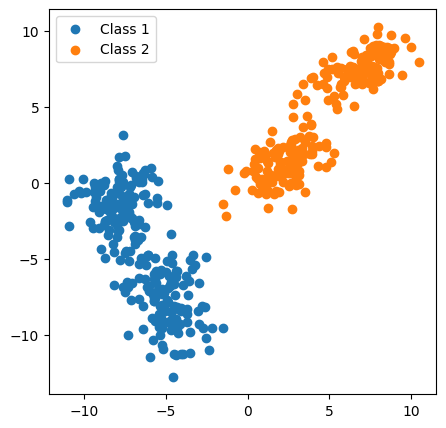

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.scatter(c1[:, 0 ] , c1[:, 1], label="Class 1")
plt.scatter(c2[:, 0 ] , c2[:, 1], label="Class 2")
plt.legend()
plt.show()

In [3]:
total_num_of_examples = c1.shape[0] + c2.shape[0]

c1_sample_size = c1.shape[0]
c2_sample_size = c2.shape[0]

c1_prior = c1_sample_size / total_num_of_examples
c2_prior = c2_sample_size / total_num_of_examples

print("class 1 prior prob : ", c1_prior)
print("class 2 prior prob : ", c2_prior)
# They are both 0.5 therefore prior probabilities is not effecting class decisions

class 1 prior prob :  0.5
class 2 prior prob :  0.5


### Parzen Window

In [4]:
liste = [] # to save in csv

class1_test = np.empty((0,2)) # to plot in graph
class2_test = np.empty((0,2)) # to plot in graph

df = pd.DataFrame()
for sample in test:
    distance1 = np.linalg.norm(sample - c1, axis=1) # vectorized calculation of distance between a test sample and class1 samples
    distance2 = np.linalg.norm(sample - c2, axis=1) # vectorized calculation of distance between a test sample and class2 samples
    all_distances = np.hstack((distance1, distance2)) # concat them together to check minimum distances

    # Here is [(x-x^n) / h ] in the density equation in a vectorized way
    distance1 /= h
    distance2 /= h

    # Here we use K function to determine whether they are inside window or not 
    c1_k = np.sum(distance1 < 1/2)
    c2_k = np.sum(distance2 < 1/2)

    # Here we calculate the probability of each class
    density1 = 1 / (c1_sample_size * h**2) * c1_k
    density2 = 1 / (c2_sample_size * h**2) * c2_k

    # If density1 > density2 then it is class 1 else class 2
    if density1 > density2:
        liste.append(1)
        class1_test = np.vstack((class1_test, sample))
    else:
        liste.append(2)
        class2_test = np.vstack((class2_test, sample))

pd.DataFrame(liste, columns=["label"]).to_csv("parzen-window-result.csv", index=False)

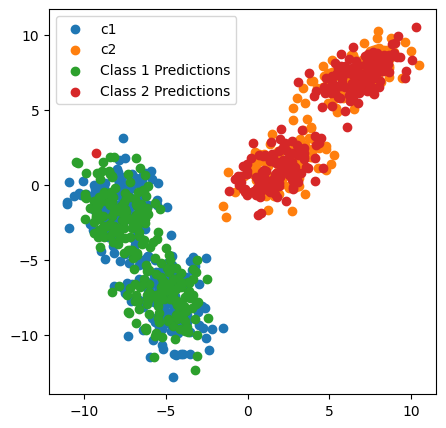

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.scatter(c1[:, 0 ] , c1[:, 1], label="c1")
plt.scatter(c2[:, 0 ] , c2[:, 1], label="c2")
plt.scatter(class1_test[:, 0] , class1_test[:, 1], label="Class 1 Predictions")
plt.scatter(class2_test[:, 0] , class2_test[:, 1], label="Class 2 Predictions")

plt.legend()
plt.show()

### KNN

In [6]:
# Calculate KNN
class1_test = np.empty((0,2)) # to plot in graph
class2_test = np.empty((0,2)) # to plot in graph

liste = [] # to save in csv
for sample in test:
    distance1 = np.linalg.norm(sample - c1, axis=1) # vectorized calculation of distance between a test sample and class1 samples
    distance2 = np.linalg.norm(sample - c2, axis=1) # vectorized calculation of distance between a test sample and class2 samples
    all_distances = np.hstack((distance1, distance2)) # concat them together to check minimum distances
    

    min_indexes = all_distances.argsort()[:k]

    # if index < 249 , then it is class 1 , else it is class 2
    c1_prediction_k = np.sum(min_indexes <= 249)
    c2_prediction_k = np.sum(min_indexes > 249)

    min_values = all_distances[min_indexes]

    V = np.pi * min_values[-1]**2 # This is the  maximum distance between a test sample and a knn sample
    c1_density = c1_prediction_k / (c1_sample_size * V) 
    c2_density = c2_prediction_k / (c2_sample_size * V) 

    if c1_density > c2_density:
        liste.append(1)
        class1_test = np.vstack((class1_test, sample))
    else:
        liste.append(2)
        class2_test = np.vstack((class2_test, sample))

pd.DataFrame(liste, columns=["label"]).to_csv("knn-result.csv", index=False)

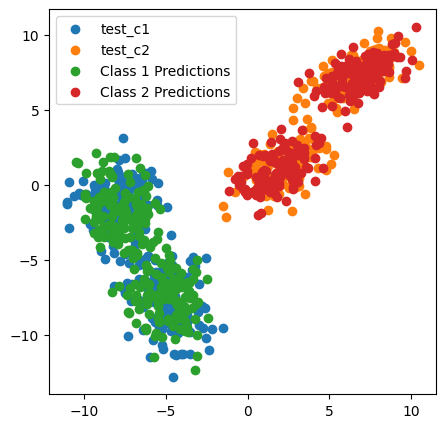

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.scatter(c1[:, 0 ] , c1[:, 1], label="test_c1")
plt.scatter(c2[:, 0 ] , c2[:, 1], label="test_c2")
plt.scatter(class1_test[:, 0] , class1_test[:, 1], label="Class 1 Predictions")
plt.scatter(class2_test[:, 0] , class2_test[:, 1], label="Class 2 Predictions")

plt.legend()
plt.show()


### Part 2 

You will make a regression analysis to the second dataset, as in your lecture notes, using M=1, M=3, M=6, and M=9. Report the error rate of the f(x) estimations in the test data of your models in a separate cell from regression coding. Tabulate your results with and without regularization. Please also provide your experiment results with different regularization parameters in your reports.

#### Note: Don't forget add comments in your codes.

[1]: https://mathworld.wolfram.com/NonparametricEstimation.html#:~:text=Nonparametric%20estimation%20is%20a%20statistical,have%20no%20meaningful%20associated%20parameters.

[2]:https://www.cs.cmu.edu/~epxing/Class/10701-08s/reading/R1-b.pdf

[3]:https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html 


In [90]:
train_data = pd.read_csv("Part2/train.csv").drop(["Unnamed: 0"], axis=1)
train_data.columns = ["x","label"]

In [91]:
#normalize x with mean and std
train_data["label"] = (train_data["label"] - train_data["label"].mean()) / train_data["label"].std()

In [92]:
%matplotlib inline
train_data.sort_values(by="x", inplace = True)

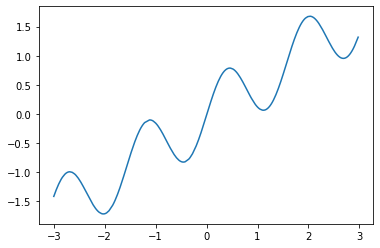

In [93]:
plt.plot(train_data.x, train_data.label)

In [99]:
def loss(y, y_head, w, m):
    loss = np.mean(np.square(y_head - y), axis=0)
    #loss = y_head - y
    return loss

def derivatives(X, y, y_head, w):
    dataset_size = X.shape[0]
    regularization =  0.001 * np.sum(w)
    dw = (1/dataset_size)*(np.dot(X.T, (y_head - y)) + regularization) # Gradient of Weights + regularization term
    db = (1/dataset_size)*np.sum((y_head - y))  # Gradient of bias
    return dw, db

def make_polynomial(X, degree):
    t = X.copy()

    # Add polynomial degree to feature space
    for i in range(2, degree+1):
        X = np.append(X, t**i, axis=1)
            
    return X

def train(X, y, degrees, epochs, learning_rate):
    
    x = make_polynomial(X, degrees)
    m, n = x.shape
    
    w = np.zeros((n,1))
    b = 0
    
    y = y.reshape(m,1)
    
    losses = []
    
    for epoch in range(epochs):
        
        y_head = np.dot(x, w) + b
        
        dw, db = derivatives(x, y, y_head, w)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        l = loss(y, np.dot(x, w) + b, w, m)
        losses.append(l)

    return w, b, losses

def predict(X, w, b, degrees):

    x1 = make_polynomial(X, degrees)
    
    return np.dot(x1, w) + b

In [100]:
x = train_data.x.values.reshape(-1,1)
y = train_data.label.values

In [173]:
def experiment(degree=1, lr=0.01):
    w, b, l = train(x, y, degrees=degree, epochs=10000,
                    learning_rate=lr)
    predictions = predict(x, w, b, degrees=degree)

    plt.plot(train_data.x, train_data.label, label = "ground_truth")
    plt.plot(train_data.x, predictions, label = "prediction")
    plt.legend()
    plt.show()
    # print error rate
    print("Error rate:", np.mean(np.abs(predictions - y)))
    print(w)

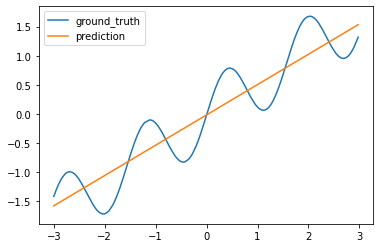

Error rate: 1.1045303593914013
[[0.52085981]]


In [175]:
experiment(degree=1, lr=0.01) # degree 1 cannot learn because dataset is not linear

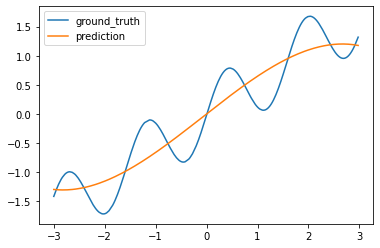

Error rate: 1.1085918105041221
[[ 0.68537154]
 [-0.00698807]
 [-0.03039469]]


In [176]:
experiment(3, lr=0.01) # it fits a bit better but still cannot learn

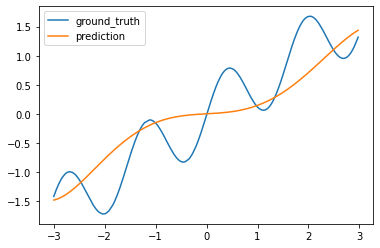

Error rate: 1.0158865427411436
[[ 0.04873718]
 [-0.0003027 ]
 [ 0.1057585 ]
 [-0.00341562]
 [-0.00632236]
 [ 0.0003593 ]]


In [180]:
# it fits a bit better but still cannot learn
# I reduced lr significantly because gradients explode and cannot learn
experiment(6, lr=0.00001) 

<ipython-input-99-53985562b722>:2: RuntimeWarning: overflow encountered in square
  loss = np.mean(np.square(y_head - y), axis=0)
C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


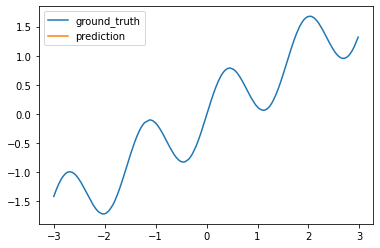

Error rate: nan
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [182]:
# After 6 degrees, it is not able to learn because the gradients explode and it goes to infitity because of the polynomial features.
# even if i use regularization and reduced learning rate , it did not have any effect. I could use gradient clipping however i am not sure if its within scope of this lesson.
experiment(9)

In [188]:
## In order to report my results better , I will use sklearn library

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def experiment_sklearn(degree=1):
    polynomial_reg = PolynomialFeatures(degree=degree)
    x_polynomial = polynomial_reg.fit_transform(x)
    linear_reg=LinearRegression()
    linear_reg.fit(x_polynomial,y)
    predictions = linear_reg.predict(x_polynomial)

    plt.plot(train_data.x, train_data.label, label = "ground_truth")
    plt.plot(train_data.x, predictions, label = "prediction")
    plt.legend()
    print("Error rate:", np.mean(np.abs(predictions - y)))

    plt.show()

Error rate: 0.36288539573692774


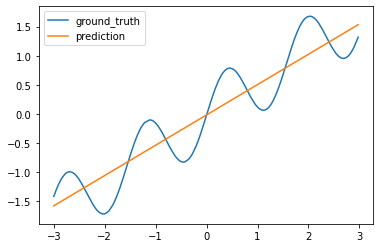

In [193]:
experiment_sklearn(degree=1)
# degree 1 cannot fit because dataset is not linear

Error rate: 0.33380803235748036


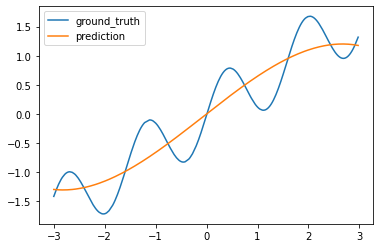

In [194]:
experiment_sklearn(degree=3)
# it fits a bit better but still cannot learn

Error rate: 0.31602455647299166


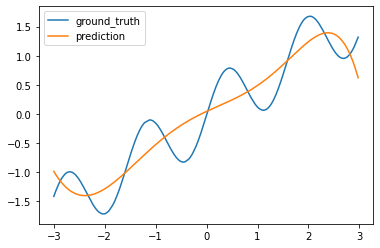

In [195]:
experiment_sklearn(degree=6)
# it fits a bit better but still cannot learn

Error rate: 0.22099689777110512


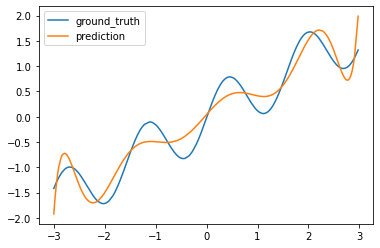

In [196]:
experiment_sklearn(degree=9)
# Here it is able to learn , however i could not achieve that result with my own code because of the gradient exploding.